# Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.svm

# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/'

In [3]:
df=pd.read_csv(work_dir+'Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


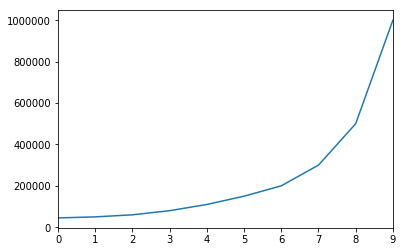

In [4]:
df['Salary'].plot()

In [36]:
X=df.as_matrix(['Level'])
Y=df['Salary'].values
X,Y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

# Clean up missing data

In [6]:
sum(np.isnan(X)),sum(np.isnan(Y))

(array([0]), 0)

In [9]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [16]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,3])
# X[:,3]=label_encoder.transform(X[:,3])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[3]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
# X

# Avoid the dummy variable trap

In [18]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [11]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [37]:
X_scaler,Y_scaler=sklearn.preprocessing.StandardScaler().fit(X),sklearn.preprocessing.StandardScaler().fit(Y)
X_scaled,Y_scaled=X_scaler.transform(X),Y_scaler.transform(Y)
X_scaled,Y_scaled

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
        -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325]))

# Train/test split

In [36]:
# X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X,Y,test_size=0,random_state=0)
# Y_train.size,Y_test.size

In [37]:
# X_train,Y_train

In [38]:
# X_test,Y_test

# Regression - sklearn.svm.SVR()

In [38]:
svm_reg=sklearn.svm.SVR(kernel='rbf').fit(X_scaled,Y_scaled)
svm_reg.score(X_scaled,Y_scaled)

0.7516001070620798

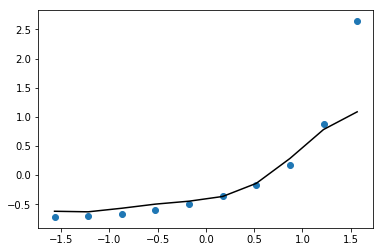

In [39]:
plt.scatter(X_scaled,Y_scaled)
plt.plot(X_scaled,svm_reg.predict(X_scaled),color='black')

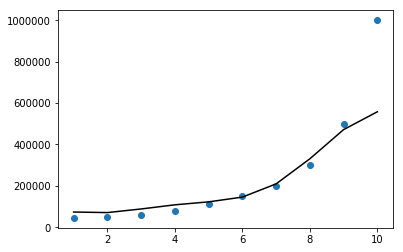

In [40]:
plt.scatter(X,Y)
plt.plot(X,Y_scaler.inverse_transform(svm_reg.predict(X_scaled)),color='black')

In [42]:
Y_scaler.inverse_transform(svm_reg.predict(X_scaler.transform(np.array([[6.5]]))))

array([ 170370.0204065])